In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from scipy.stats import linregress
from config import g_key

In [79]:
total_crime_rates = pd.read_csv("CSV_Files/Crime_Rates/total_crime_rates.csv")
total_crime_rates

,Unnamed: 0,State,ORI,"City, State",Population,Total Crime,Total Person Crime,Total Property Crime,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,34958,8528,26430,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,2591,338,2253,5507.844054,718.506866,4789.337188
2,CHATTANOOGA POLICE DEPARTMENT,TN,TN0330100,"Chattanooga city, Tennessee",177365.0,24263,4026,20237,13679.700054,2269.895413,11409.804640
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,212548,51064,161484,7818.418241,1878.350815,5940.067426
4,DALLAS POLICE DEPARTMENT,TX,TXDPD0000,"Dallas city, Texas",1318806.0,114909,24207,90702,8713.108676,1835.523951,6877.584724
5,DENVER POLICE DEPARTMENT,CO,CODPD0000,"Denver city, Colorado",693417.0,66074,11391,54683,9528.753982,1642.734458,7886.019524
6,KANSAS CITY POLICE DEPARTMENT,MO,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
7,LAS VEGAS METRO POLICE DEPARTMENT,NV,NV0020100,"Las Vegas city, Nevada",626637.0,110200,17708,92492,17585.938909,2825.878459,14760.060450
8,NEW ORLEANS POLICE DEPARTMENT,LA,LANPD0000,"New Orleans city, Louisiana",389648.0,50790,9032,41758,13034.841703,2317.989570,10716.852133
9,PORTLAND POLICE BUREAU,OR,OR0260200,"Portland city, Oregon",639387.0,76641,7485,69156,11986.637201,1170.652516,10815.984685


In [105]:
total_crime_rates = total_crime_rates.rename(columns={"Unnamed: 0": "Police Department"})
total_crime_rates

,Police Department,State,ORI,"City, State",Population,Total Crime,Total Person Crime,Total Property Crime,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,34958,8528,26430,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,2591,338,2253,5507.844054,718.506866,4789.337188
2,CHATTANOOGA POLICE DEPARTMENT,TN,TN0330100,"Chattanooga city, Tennessee",177365.0,24263,4026,20237,13679.700054,2269.895413,11409.804640
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,212548,51064,161484,7818.418241,1878.350815,5940.067426
4,DALLAS POLICE DEPARTMENT,TX,TXDPD0000,"Dallas city, Texas",1318806.0,114909,24207,90702,8713.108676,1835.523951,6877.584724
5,DENVER POLICE DEPARTMENT,CO,CODPD0000,"Denver city, Colorado",693417.0,66074,11391,54683,9528.753982,1642.734458,7886.019524
6,KANSAS CITY POLICE DEPARTMENT,MO,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
7,LAS VEGAS METRO POLICE DEPARTMENT,NV,NV0020100,"Las Vegas city, Nevada",626637.0,110200,17708,92492,17585.938909,2825.878459,14760.060450
8,NEW ORLEANS POLICE DEPARTMENT,LA,LANPD0000,"New Orleans city, Louisiana",389648.0,50790,9032,41758,13034.841703,2317.989570,10716.852133
9,PORTLAND POLICE BUREAU,OR,OR0260200,"Portland city, Oregon",639387.0,76641,7485,69156,11986.637201,1170.652516,10815.984685


In [127]:
hotel_ratings = pd.read_csv("CSV_Files/avg_hotel_rating.csv")
hotel_ratings

,State,Hotel Rating
0,CA,4.12
1,IL,4.35
2,LA,4.42
3,MA,4.43
4,MO,4.31
5,NV,4.12
6,OR,4.40
7,SD,4.33
8,TN,4.26
9,TX,4.34


In [5]:
#Average hotel rating per city info box map
gmaps.configure(api_key=g_key)
hotel_list = [{"City": "Kansas City", "location": (39.09973, -94.57857), "Average Hotel Rating": 4.26},
             {"City": "New Orleans", "location": (29.95465, -90.07507), "Average Hotel Rating": 4.24}, 
             {"City": "Dallas", "location": (32.78306, -96.80667), "Average Hotel Rating": 4.29}, 
             {"City": "Portland", "location": (45.52345, -122.67621), "Average Hotel Rating": 4.42},
             {"City": "Charlottesville", "location": (38.0293059, -78.4766781), "Average Hotel Rating": 4.24}, 
             {"City": "Chicago", "location": (41.85003, -87.65005), "Average Hotel Rating": 4.3},
             {"City": "Denver", "location": (39.73915, -104.9847), "Average Hotel Rating": 4.38},
             {"City": "Sioux Falls", "location": (43.54997, -96.70033), "Average Hotel Rating": 4.42},
             {"City": "Las Vegas", "location": (36.17497, -115.13722), "Average Hotel Rating": 4.34},
             {"City": "San Francisco", "location": (37.77493, -122.41942), "Average Hotel Rating": 4.17},
             {"City": "Chattanooga", "location": (35.04563, -85.30968), "Average Hotel Rating": 4.33},
             {"City": "Boston", "location": (42.35843, -71.05977), "Average Hotel Rating": 4.26}]

hotel_locations = [hotel["location"] for hotel in hotel_list]
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Average Hotel Rating</dt><dd>{Average Hotel Rating}</dd>
</dl>
"""
hotel_info = [info_box_template.format(**hotel) for hotel in hotel_list] 
marker_layer = gmaps.marker_layer(hotel_locations, info_box_content=hotel_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
#map with info box of total crimes per city
gmaps.configure(api_key=g_key)
hotel_list = [{"City": "Kansas City", "location": (39.09973, -94.57857), "Population": 481417, "Total Crime": 52815},
             {"City": "New Orleans", "location": (29.95465, -90.07507), "Population": 389648, "Total Crime": 50790}, 
             {"City": "Dallas", "location": (32.78306, -96.80667), "Population": 1318806, "Total Crime": 114909}, 
             {"City": "Portland", "location": (45.52345, -122.67621), "Population": 639387, "Total Crime": 76641},
             {"City": "Charlottesville", "location": (38.0293059, -78.4766781), "Population": 47042, "Total Crime": 2591}, 
             {"City": "Chicago", "location": (41.85003, -87.65005), "Population": 2718555, "Total Crime": 212548},
             {"City": "Denver", "location": (39.73915, -104.9847), "Population": 693417, "Total Crime": 66074},
             {"City": "Sioux Falls", "location": (43.54997, -96.70033), "Population": 174151, "Total Crime": 13230},
             {"City": "Las Vegas", "location": (36.17497, -115.13722), "Population": 626637, "Total Crime": 110200},
             {"City": "San Francisco", "location": (37.77493, -122.41942), "Population": 870044, "Total Crime": 109482},
             {"City": "Chattanooga", "location": (35.04563, -85.30968), "Population": 177365, "Total Crime": 24263},
             {"City": "Boston", "location": (42.35843, -71.05977), "Population": 679413, "Total Crime": 34958}]

hotel_locations = [hotel["location"] for hotel in hotel_list]
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Population</dt><dd>{Population}</dd>
<dt>Total Crime</dt><dd>{Total Crime}</dd>
</dl>
"""
hotel_info = [info_box_template.format(**hotel) for hotel in hotel_list] 
marker_layer = gmaps.marker_layer(hotel_locations, info_box_content=hotel_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [128]:
#merge on State
rating_crime_df = pd.merge(hotel_ratings, total_crime_rates, on="State")
rating_crime_df

,State,Hotel Rating,Police Department,ORI,"City, State",Population,Total Crime,Total Person Crime,Total Property Crime,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,CA,4.12,SAN FRANCISCO POLICE DEPARTMENT,CA0380100,"San Francisco city, California",870044.0,109482,11866,97616,12583.501524,1363.839070,11219.662454
1,IL,4.35,CHICAGO POLICE DEPT,ILCPD0000,"Chicago city, Illinois",2718555.0,212548,51064,161484,7818.418241,1878.350815,5940.067426
2,LA,4.42,NEW ORLEANS POLICE DEPARTMENT,LANPD0000,"New Orleans city, Louisiana",389648.0,50790,9032,41758,13034.841703,2317.989570,10716.852133
3,MA,4.43,BOSTON POLICE DEPARTMENT,MA0130100,"Boston city, Massachusetts",679413.0,34958,8528,26430,5145.323978,1255.201181,3890.122797
4,MO,4.31,KANSAS CITY POLICE DEPARTMENT,MOKPD0000,"Kansas City city, Missouri",481417.0,52815,14407,38408,10970.738466,2992.623858,7978.114608
5,NV,4.12,LAS VEGAS METRO POLICE DEPARTMENT,NV0020100,"Las Vegas city, Nevada",626637.0,110200,17708,92492,17585.938909,2825.878459,14760.060450
6,OR,4.40,PORTLAND POLICE BUREAU,OR0260200,"Portland city, Oregon",639387.0,76641,7485,69156,11986.637201,1170.652516,10815.984685
7,SD,4.33,SIOUX FALLS POLICE DEPARTMENT,SD0490200,"Sioux Falls city, South Dakota",174151.0,13230,1895,11335,7596.855602,1088.136158,6508.719445
8,TN,4.26,CHATTANOOGA POLICE DEPARTMENT,TN0330100,"Chattanooga city, Tennessee",177365.0,24263,4026,20237,13679.700054,2269.895413,11409.804640
9,TX,4.34,DALLAS POLICE DEPARTMENT,TXDPD0000,"Dallas city, Texas",1318806.0,114909,24207,90702,8713.108676,1835.523951,6877.584724


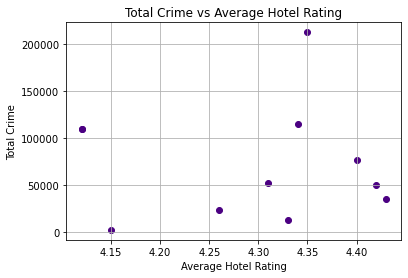

In [129]:
#Total Crime vs Hotel Rating scatter plot 
plt.scatter(rating_crime_df["Hotel Rating"], rating_crime_df["Total Crime"], marker="o", color="indigo")
plt.title("Total Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Crime")
plt.savefig("TotalCrimevsHotelRating.png")
plt.grid()
plt.show()

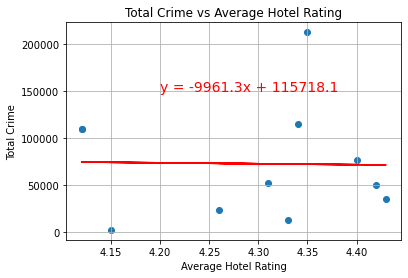

The r-squared is: 0.00035960439055104693


In [147]:
#Total Crime vs Hotel Rating linear regression
x_values = rating_crime_df["Hotel Rating"]
y_values = rating_crime_df["Total Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Crime")
plt.annotate(line_equation,(4.20,150000), fontsize=14, color="red")
plt.savefig("TotalCrimevsHotelRatingLinear.png")
plt.grid()
plt.show()

print(f"The r-squared is: {rvalue**2}")

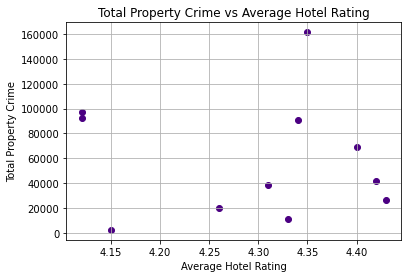

In [132]:
#Total Property Crime vs Hotel Rating scatter plot 
plt.scatter(rating_crime_df["Hotel Rating"], rating_crime_df["Total Property Crime"], marker="o", color="indigo")
plt.title("Total Property Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Property Crime")
plt.savefig("PropertyCrimevsHotelRating.png")
plt.grid()
plt.show()

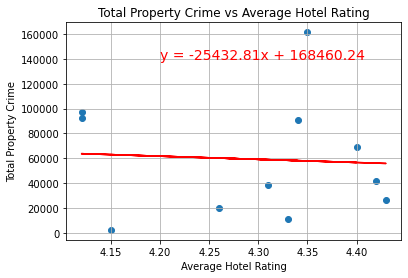

The r-squared is: 0.0037924813795364326


In [148]:
#Total Property Crime vs Hotel Rating linear regression
x_values = rating_crime_df["Hotel Rating"]
y_values = rating_crime_df["Total Property Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Property Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Property Crime")
plt.annotate(line_equation,(4.20,140000), fontsize=14, color="red")
plt.savefig("PropertyCrimevsHotelRatingLinear.png")
plt.grid()
plt.show()

print(f"The r-squared is: {rvalue**2}")

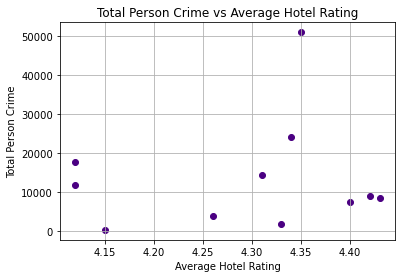

In [135]:
#Total Person Crime vs Hotel Rating scatter plot 
plt.scatter(rating_crime_df["Hotel Rating"], rating_crime_df["Total Person Crime"], marker="o", color="indigo")
plt.title("Total Person Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Person Crime")
plt.savefig("PersonCrimevsHotelRating.png")
plt.grid()
plt.show()

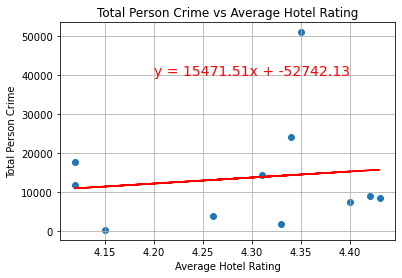

The r-squared is: 0.015940300334009453


In [149]:
#Total Person Crime vs Hotel Rating linear regression
x_values = rating_crime_df["Hotel Rating"]
y_values = rating_crime_df["Total Person Crime"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Person Crime vs Average Hotel Rating")
plt.xlabel("Average Hotel Rating")
plt.ylabel("Total Person Crime")
plt.annotate(line_equation,(4.20,40000), fontsize=14, color="red")
plt.savefig("PersonCrimevsHotelRatingLinear.png")
plt.grid()
plt.show()

print(f"The r-squared is: {rvalue**2}")

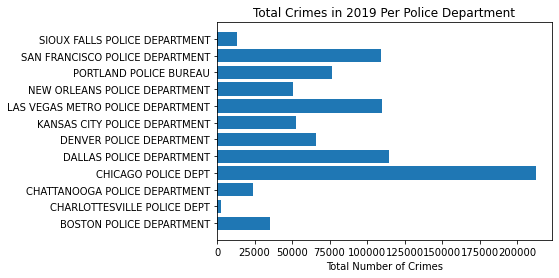

In [108]:
#Total Crimes in 2019 Per Police Department in each city
x_values = total_crime_rates["Police Department"]
y_values = total_crime_rates["Total Crime"]
plt.barh(x_values, y_values)
plt.title("Total Crimes in 2019 Per Police Department")
plt.xlabel("Total Number of Crimes")
plt.savefig("TotalCrimesperDept.png")
plt.show()

In [109]:
df.index = index

In [112]:
df.index

Index(['BOSTON POLICE DEPARTMENT', 'CHARLOTTESVILLE POLICE DEPT',
       'CHATTANOOGA POLICE DEPARTMENT', 'CHICAGO POLICE DEPT',
       'DALLAS POLICE DEPARTMENT', 'DENVER POLICE DEPARTMENT',
       'KANSAS CITY POLICE DEPARTMENT', 'LAS VEGAS METRO POLICE DEPARTMENT',
       'NEW ORLEANS POLICE DEPARTMENT', 'PORTLAND POLICE BUREAU',
       'SAN FRANCISCO POLICE DEPARTMENT', 'SIOUX FALLS POLICE DEPARTMENT'],
      dtype='object', name='Unnamed: 0')

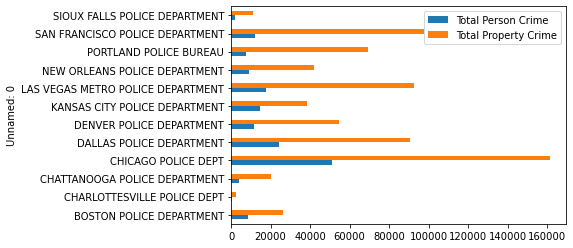

In [111]:
ax=df.plot.barh()

In [83]:
pop_offense = pd.read_csv("CSV_Files/Crime_Rates/all_crime_rates.csv")
pop_offense

,Unnamed: 0,State,ORI,"City, State",Population,Agg Assault,Arson,Auto Theft,Burglary,Homicide,...,Burglary Crime Rate,Homicide Crime Rate,Larceny Crime Rate,Property Crime Rate,Robbery Crime Rate,Sex Crimes Rate,Violent Crime Rate,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,2932,4,920,1703,42,...,250.657553,6.181807,1558.698465,1944.767027,152.926129,33.999938,630.544308,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,103,5,78,122,0,...,259.342715,0.000000,1964.202202,2389.354194,46.766719,68.024319,384.762553,5507.844054,718.506866,4789.337188
2,CHATTANOOGA POLICE DEPARTMENT,TN,TN0330100,"Chattanooga city, Tennessee",177365.0,1556,25,1314,1098,33,...,619.062385,18.605700,4337.947171,5697.854706,110.506582,90.773264,1172.722916,13679.700054,2269.895413,11409.804640
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,15296,0,9081,9578,492,...,352.319523,18.097850,2283.676438,2970.033713,293.648648,64.777060,939.175408,7818.418241,1878.350815,5940.067426
4,DALLAS POLICE DEPARTMENT,TX,TXDPD0000,"Dallas city, Texas",1318806.0,6369,144,10257,9210,198,...,698.358970,15.013580,1957.224944,3433.332878,333.635121,60.433453,943.504958,8713.108676,1835.523951,6877.584724
5,DENVER POLICE DEPARTMENT,CO,CODPD0000,"Denver city, Colorado",693417.0,3474,107,5294,3967,67,...,572.094425,9.662296,2599.734359,3935.294347,173.777107,102.824130,855.473690,9528.753982,1642.734458,7886.019524
6,KANSAS CITY POLICE DEPARTMENT,MO,MOKPD0000,"Kansas City city, Missouri",481417.0,5159,160,3801,3070,150,...,637.700787,31.158019,2545.194706,3972.439694,299.740142,72.078884,1518.018682,10970.738466,2992.623858,7978.114608
7,LAS VEGAS METRO POLICE DEPARTMENT,NV,NV0020100,"Las Vegas city, Nevada",626637.0,5213,98,7311,10646,84,...,1698.910214,13.404890,4506.596323,7372.210706,337.994724,229.638531,1412.939230,17585.938909,2825.878459,14760.060450
8,NEW ORLEANS POLICE DEPARTMENT,LA,LANPD0000,"New Orleans city, Louisiana",389648.0,2608,0,2951,2143,121,...,549.983575,31.053669,4051.092268,5358.426067,259.978237,198.640825,1158.994785,13034.841703,2317.989570,10716.852133
9,PORTLAND POLICE BUREAU,OR,OR0260200,"Portland city, Oregon",639387.0,2230,252,6432,4200,29,...,656.879167,4.535594,3725.443276,5388.285968,153.115406,57.555127,606.674831,11986.637201,1170.652516,10815.984685


In [90]:
pop_offense = pop_offense.rename(columns={"Unnamed: 0": "Police Department"})
pop_offense

,Police Department,State,ORI,"City, State",Population,Agg Assault,Arson,Auto Theft,Burglary,Homicide,...,Burglary Crime Rate,Homicide Crime Rate,Larceny Crime Rate,Property Crime Rate,Robbery Crime Rate,Sex Crimes Rate,Violent Crime Rate,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,2932,4,920,1703,42,...,250.657553,6.181807,1558.698465,1944.767027,152.926129,33.999938,630.544308,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,103,5,78,122,0,...,259.342715,0.000000,1964.202202,2389.354194,46.766719,68.024319,384.762553,5507.844054,718.506866,4789.337188
2,CHATTANOOGA POLICE DEPARTMENT,TN,TN0330100,"Chattanooga city, Tennessee",177365.0,1556,25,1314,1098,33,...,619.062385,18.605700,4337.947171,5697.854706,110.506582,90.773264,1172.722916,13679.700054,2269.895413,11409.804640
3,CHICAGO POLICE DEPT,IL,ILCPD0000,"Chicago city, Illinois",2718555.0,15296,0,9081,9578,492,...,352.319523,18.097850,2283.676438,2970.033713,293.648648,64.777060,939.175408,7818.418241,1878.350815,5940.067426
4,DALLAS POLICE DEPARTMENT,TX,TXDPD0000,"Dallas city, Texas",1318806.0,6369,144,10257,9210,198,...,698.358970,15.013580,1957.224944,3433.332878,333.635121,60.433453,943.504958,8713.108676,1835.523951,6877.584724
5,DENVER POLICE DEPARTMENT,CO,CODPD0000,"Denver city, Colorado",693417.0,3474,107,5294,3967,67,...,572.094425,9.662296,2599.734359,3935.294347,173.777107,102.824130,855.473690,9528.753982,1642.734458,7886.019524
6,KANSAS CITY POLICE DEPARTMENT,MO,MOKPD0000,"Kansas City city, Missouri",481417.0,5159,160,3801,3070,150,...,637.700787,31.158019,2545.194706,3972.439694,299.740142,72.078884,1518.018682,10970.738466,2992.623858,7978.114608
7,LAS VEGAS METRO POLICE DEPARTMENT,NV,NV0020100,"Las Vegas city, Nevada",626637.0,5213,98,7311,10646,84,...,1698.910214,13.404890,4506.596323,7372.210706,337.994724,229.638531,1412.939230,17585.938909,2825.878459,14760.060450
8,NEW ORLEANS POLICE DEPARTMENT,LA,LANPD0000,"New Orleans city, Louisiana",389648.0,2608,0,2951,2143,121,...,549.983575,31.053669,4051.092268,5358.426067,259.978237,198.640825,1158.994785,13034.841703,2317.989570,10716.852133
9,PORTLAND POLICE BUREAU,OR,OR0260200,"Portland city, Oregon",639387.0,2230,252,6432,4200,29,...,656.879167,4.535594,3725.443276,5388.285968,153.115406,57.555127,606.674831,11986.637201,1170.652516,10815.984685


In [96]:
ma_va = pop_offense.loc[pop_offense["State"].isin(["MA", "VA"])]
ma_va

,Police Department,State,ORI,"City, State",Population,Agg Assault,Arson,Auto Theft,Burglary,Homicide,...,Burglary Crime Rate,Homicide Crime Rate,Larceny Crime Rate,Property Crime Rate,Robbery Crime Rate,Sex Crimes Rate,Violent Crime Rate,Total Crime Rate,Total Person Crime Rate,Total Property Crime Rate
0,BOSTON POLICE DEPARTMENT,MA,MA0130100,"Boston city, Massachusetts",679413.0,2932,4,920,1703,42,...,250.657553,6.181807,1558.698465,1944.767027,152.926129,33.999938,630.544308,5145.323978,1255.201181,3890.122797
1,CHARLOTTESVILLE POLICE DEPT,VA,VA1020000,"Charlottesville city, Virginia",47042.0,103,5,78,122,0,...,259.342715,0.000000,1964.202202,2389.354194,46.766719,68.024319,384.762553,5507.844054,718.506866,4789.337188


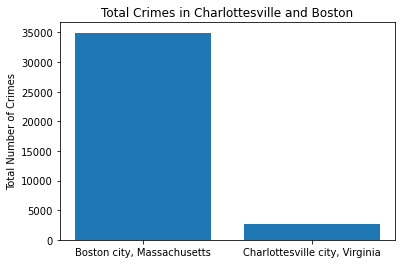

In [123]:
x_values = ma_va["City, State"]
y_values = ma_va["Total Crime"]
plt.bar(x_values, y_values)
plt.title("Total Crimes in Charlottesville and Boston")
plt.ylabel("Total Number of Crimes")
plt.savefig("TotalCrimesperMAVA.png")
plt.show()

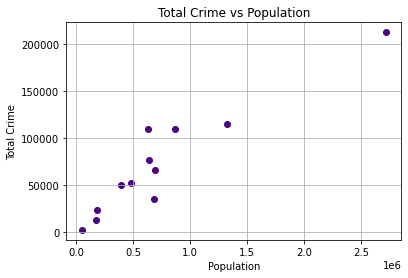

In [150]:
#scatter plot total crime vs population
plt.scatter(total_crime_rates["Population"], total_crime_rates["Total Crime"], marker="o", color="indigo")
plt.title("Total Crime vs Population")
plt.xlabel("Population")
plt.ylabel("Total Crime")
plt.savefig("TotalCrimevsPop.png")
plt.grid()
plt.show()

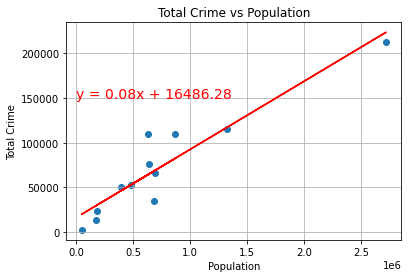

The r-squared is: 0.870195789442239


In [151]:
#Total Crime vs Population linear regression
x_values = total_crime_rates["Population"]
y_values = total_crime_rates["Total Crime"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Total Crime vs Population")
plt.xlabel("Population")
plt.ylabel("Total Crime")
plt.annotate(line_equation,(3.25,150000), fontsize=14, color="red")
plt.savefig("TotalCrimevsPopLinear.png")
plt.grid()
plt.show()

print(f"The r-squared is: {rvalue**2}")

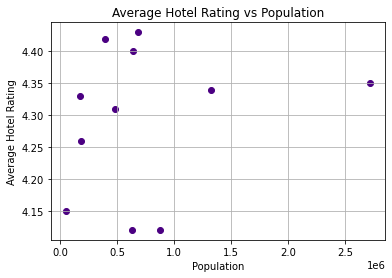

In [152]:
#scatter plot hotel rating vs population
plt.scatter(rating_crime_df["Population"], rating_crime_df["Hotel Rating"], marker="o", color="indigo")
plt.title("Average Hotel Rating vs Population")
plt.xlabel("Population")
plt.ylabel("Average Hotel Rating")
plt.savefig("HotelRatingvsPop.png")
plt.grid()
plt.show()

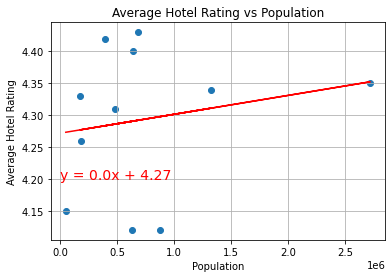

The r-squared is: 0.03643507259802325


In [153]:
#Hotel Rating vs Population linear regression
x_values = rating_crime_df["Population"]
y_values = rating_crime_df["Hotel Rating"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Average Hotel Rating vs Population")
plt.xlabel("Population")
plt.ylabel("Average Hotel Rating")
plt.annotate(line_equation,(1.5, 4.2), fontsize=14, color="red")
plt.savefig("HotelvsPopLinear.png")
plt.grid()
plt.show()

print(f"The r-squared is: {rvalue**2}")